# Assignment 25/02/2025

## Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image loading, conversion to grayscale

In [5]:
original_image = cv2.imread('./template_matching.png')
template_image = cv2.imread('./template.png')   

In [6]:
grayscale_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
grayscale_template = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY) 

Text(0.5, 1.0, 'Template')

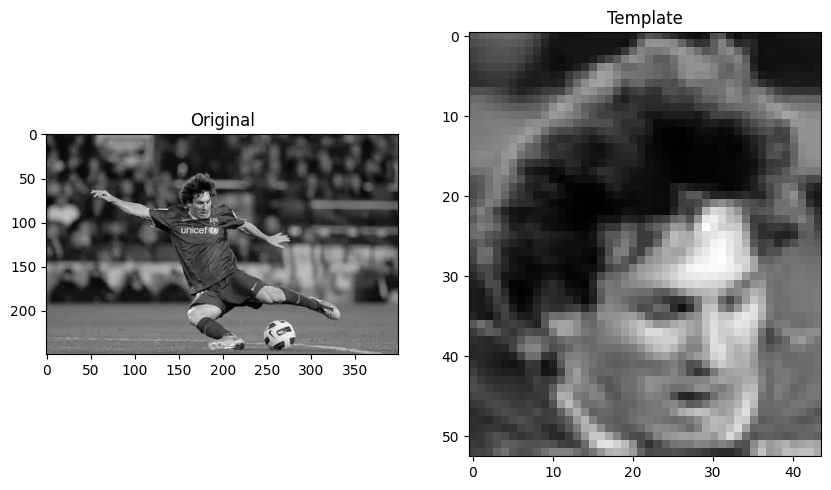

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_original, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(grayscale_template, cmap='gray')
plt.title("Template")

## Comparison of all template matching methods - OpenCV

In [8]:
# FROM DOCUMENTATION: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

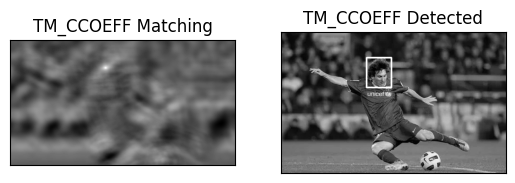

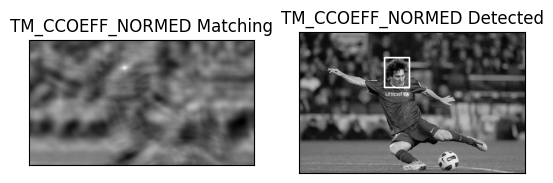

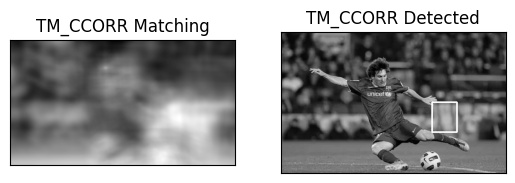

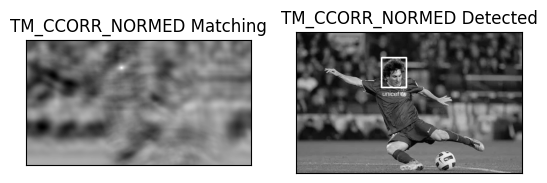

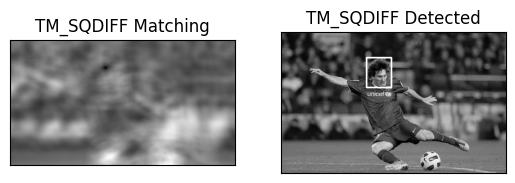

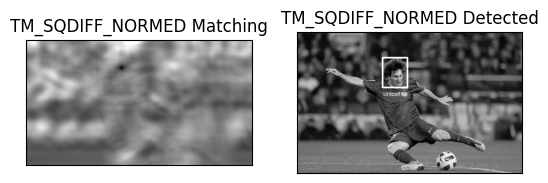

In [15]:
img2 = grayscale_original.copy()
w, h = grayscale_template.shape[::-1]
for meth in methods:
    img = img2.copy()
    method = getattr(cv2, meth)
 
    # Apply template Matching
    res = cv2.matchTemplate(img, grayscale_template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title(meth + ' Matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title(meth + ' Detected'), plt.xticks([]), plt.yticks([])
 
    plt.show()